In [60]:
# Import libraries   I

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.neighbors import LocalOutlierFactor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
# data preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Display the first few rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Summary statistics of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Information about the dataset (data types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Column names
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#Understanding our columns

info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])


age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


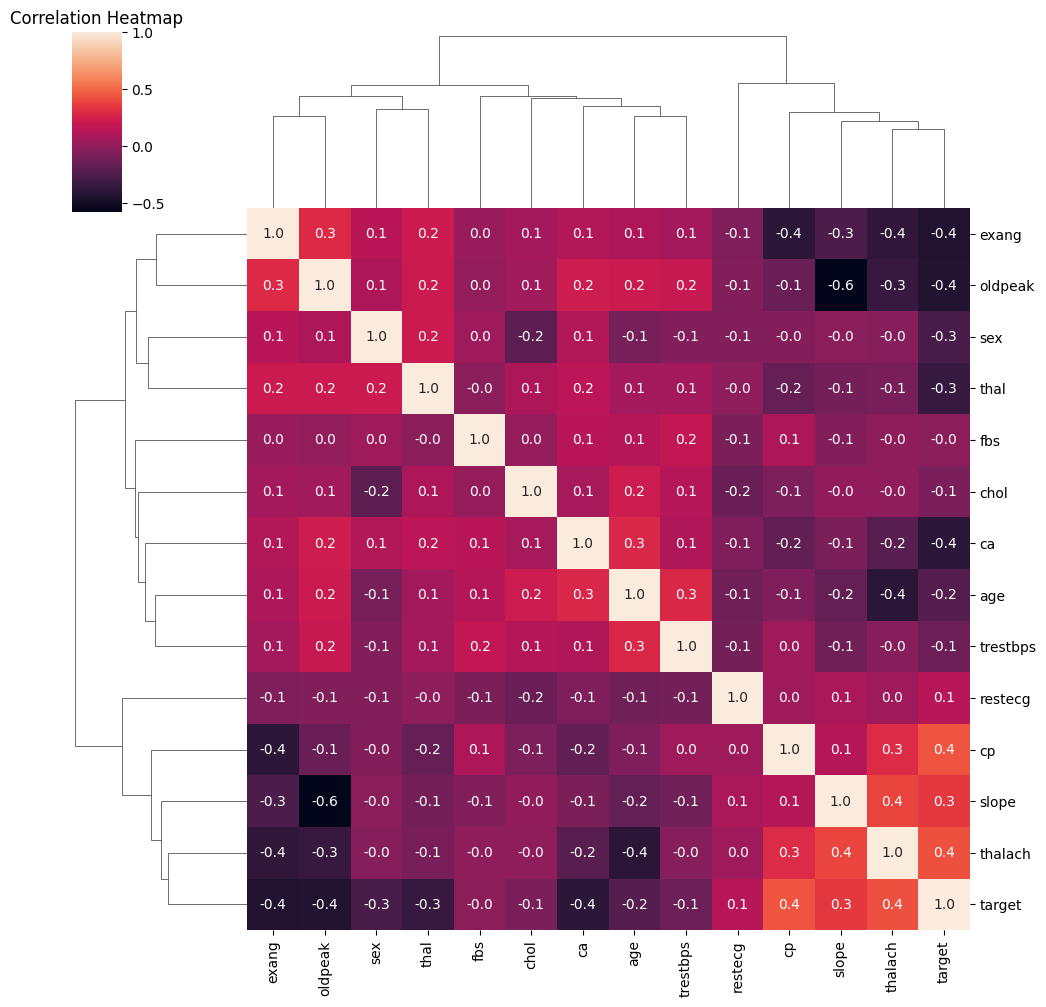

In [9]:
sns.clustermap(df.corr(), annot=True, fmt='.1f')
plt.title("Correlation Heatmap")
plt.show()

 Train Test split

In [10]:
from sklearn.model_selection import train_test_split

predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [11]:
X_train.shape

(242, 13)

In [12]:
X_test.shape

(61, 13)

In [13]:
Y_train.shape

(242,)

In [14]:
Y_test.shape

(61,)

In [15]:
Y_test.shape

(61,)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight="balanced", random_state=1243, max_iter=1000)

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

Y_pred_lr.shape

(61,)

In [18]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [19]:
log_pred = lr.predict(X_test)
log_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [20]:
log_acc = accuracy_score(Y_test, lr.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(Y_train, lr.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {log_acc} \n")

Training Accuracy of Logistic Regression is 0.8347107438016529
Test Accuracy of Logistic Regression is 0.8524590163934426 



In [21]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

Y_pred_nb.shape

(61,)

In [22]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [23]:
nb_pred = nb.predict(X_test)
nb_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [24]:
nb_acc = accuracy_score(Y_test, nb.predict(X_test))

print(f"Training Accuracy of Naive Bayes Regression is {accuracy_score(Y_train, nb.predict(X_train))}")
print(f"Test Accuracy of Naive Bayes Regression is {nb_acc} \n")

Training Accuracy of Naive Bayes Regression is 0.8347107438016529
Test Accuracy of Naive Bayes Regression is 0.8524590163934426 



In [25]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

Y_pred_svm.shape

(61,)

In [26]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [27]:
# ACCURACY SCORES, CONFUSION MATRIX, CLASSIFICATION REPORT

svm_acc = accuracy_score(Y_test, Y_pred_svm)

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(Y_train, sv.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {svm_acc} \n")

Training Accuracy of Decision Tree Classifier is 0.8471074380165289
Test Accuracy of Decision Tree Classifier is 0.819672131147541 



In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,Y_train)

Y_pred_knn=knn.predict(X_test)

Y_pred_knn.shape

(61,)

In [29]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [30]:
# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(Y_test, Y_pred_knn)

print(f"Training Accuracy of KNN is {accuracy_score(Y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

Training Accuracy of KNN is 0.7231404958677686
Test Accuracy of KNN is 0.6721311475409836 



In [58]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,predictors,target,cv=10)
    knn_scores.append(score.mean())


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

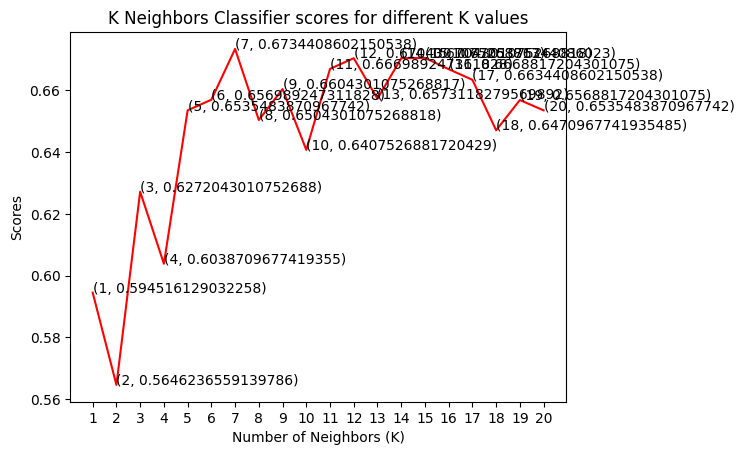

In [61]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [31]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print(Y_pred_dt.shape)

(61,)


In [32]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)







print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [66]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
Y_pred_rf.shape


(61,)

In [71]:
# ACCURACY SCORES, CONFUSION MATRIX, CLASSIFICATION REPORT

rfc_acc = accuracy_score(Y_test, Y_pred_rf)

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 88.52 %


In [35]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)
Y_pred_xgb.shape

(61,)

In [36]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.61 %


In [72]:
# accuracy score
xgb_acc = accuracy_score(Y_test, Y_pred_xgb)

print(f"Training Accuracy of XgBoost is is {accuracy_score(Y_train, xgb_model.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

Training Accuracy of XgBoost is is 1.0
Test Accuracy of XgBoost is 0.8360655737704918 



In [37]:
from keras.models import Sequential
from keras.layers import Dense

In [38]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=300)

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5417 - loss: 41.8531
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5368 - loss: 34.5607  
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.5924 - loss: 24.0909
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5441 - loss: 20.3229 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 142us/step - accuracy: 0.5107 - loss: 13.9573
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.5639 - loss: 6.4782
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6044 - loss: 3.8255 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5639 - loss: 3.9314 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.5741 - loss: 3.2800
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5728 - loss: 3.9049 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5669 - loss: 4.1817 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

In [39]:
Y_pred_nn = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step 


In [40]:
Y_pred_nn.shape

(61, 1)

In [41]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded


In [42]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 77.05 %


In [43]:
models = pd.DataFrame({
    'Model' : [ 'LogisticRegression','KNN', 'Decision Tree Classifier','SVM' ,'Random Forest Classifier','XgBoost'],
    'Score' : [log_acc,nb_acc, knn_acc, rfc_acc, svm_acc, xgb_acc]
})


models.sort_values(by = 'Score', ascending = False)

NameError: name 'rfc_acc' is not defined